In [1]:
!pip uninstall --y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle -v

Uninstalling kaggle-1.5.8:
  Successfully uninstalled kaggle-1.5.8
     |████████████████████████████████| 1.5MB 8.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 6.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=e4c0584111aafb3ea9843358c79ae1fe272ae32b8669ad925b02d5397ebb355b
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [2]:
!kaggle competitions download -c metro

  0% 0.00/14.4k [00:00<?, ?B/s]
100% 14.4k/14.4k [00:00<00:00, 13.8MB/s]


In [3]:
!unzip metro.zip

Archive:  metro.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv',header=None,skiprows=1)
df_test = pd.read_csv('test.csv',header=None,skiprows=1)
print(df_train.head(20))
# 호선  역번호           역이름          계  ...        5월        6월        7월       후불계

    0    1             2          3   ...        9         10        11        12
0    1  150        서울역(1)  1211.7500  ...  182.2907  168.8385  174.1978  715.5939
1    1  151         시청(1)   539.1578  ...   82.4692   75.4209   78.2444  326.5427
2    1  152            종각   930.0178  ...  138.4409  125.1023  137.5099  590.2978
3    1  153       종로3가(1)   738.6232  ...  111.5802  102.4958  107.2728  323.4285
4    1  154          종로5가   575.7888  ...   87.2246   78.8147   80.6410  247.1974
5    1  155        동대문(1)   320.7042  ...   49.2920   45.6262   44.7576  124.9851
6    1  156        신설동(1)   343.5638  ...   52.1571   47.9401   49.9833  169.4769
7    1  157           제기동   436.4425  ...   65.4171   61.3337   61.6788  136.8550
8    1  158           청량리   547.7924  ...   81.9413   75.7575   75.2762  220.0010
9    1  159        동묘앞(1)   239.9313  ...   37.9263   34.4322   31.2986   73.6632
10   2  201         시청(2)   538.0180  ...   81.0947   75.0949   82.0939  337.5464
11   2  202     

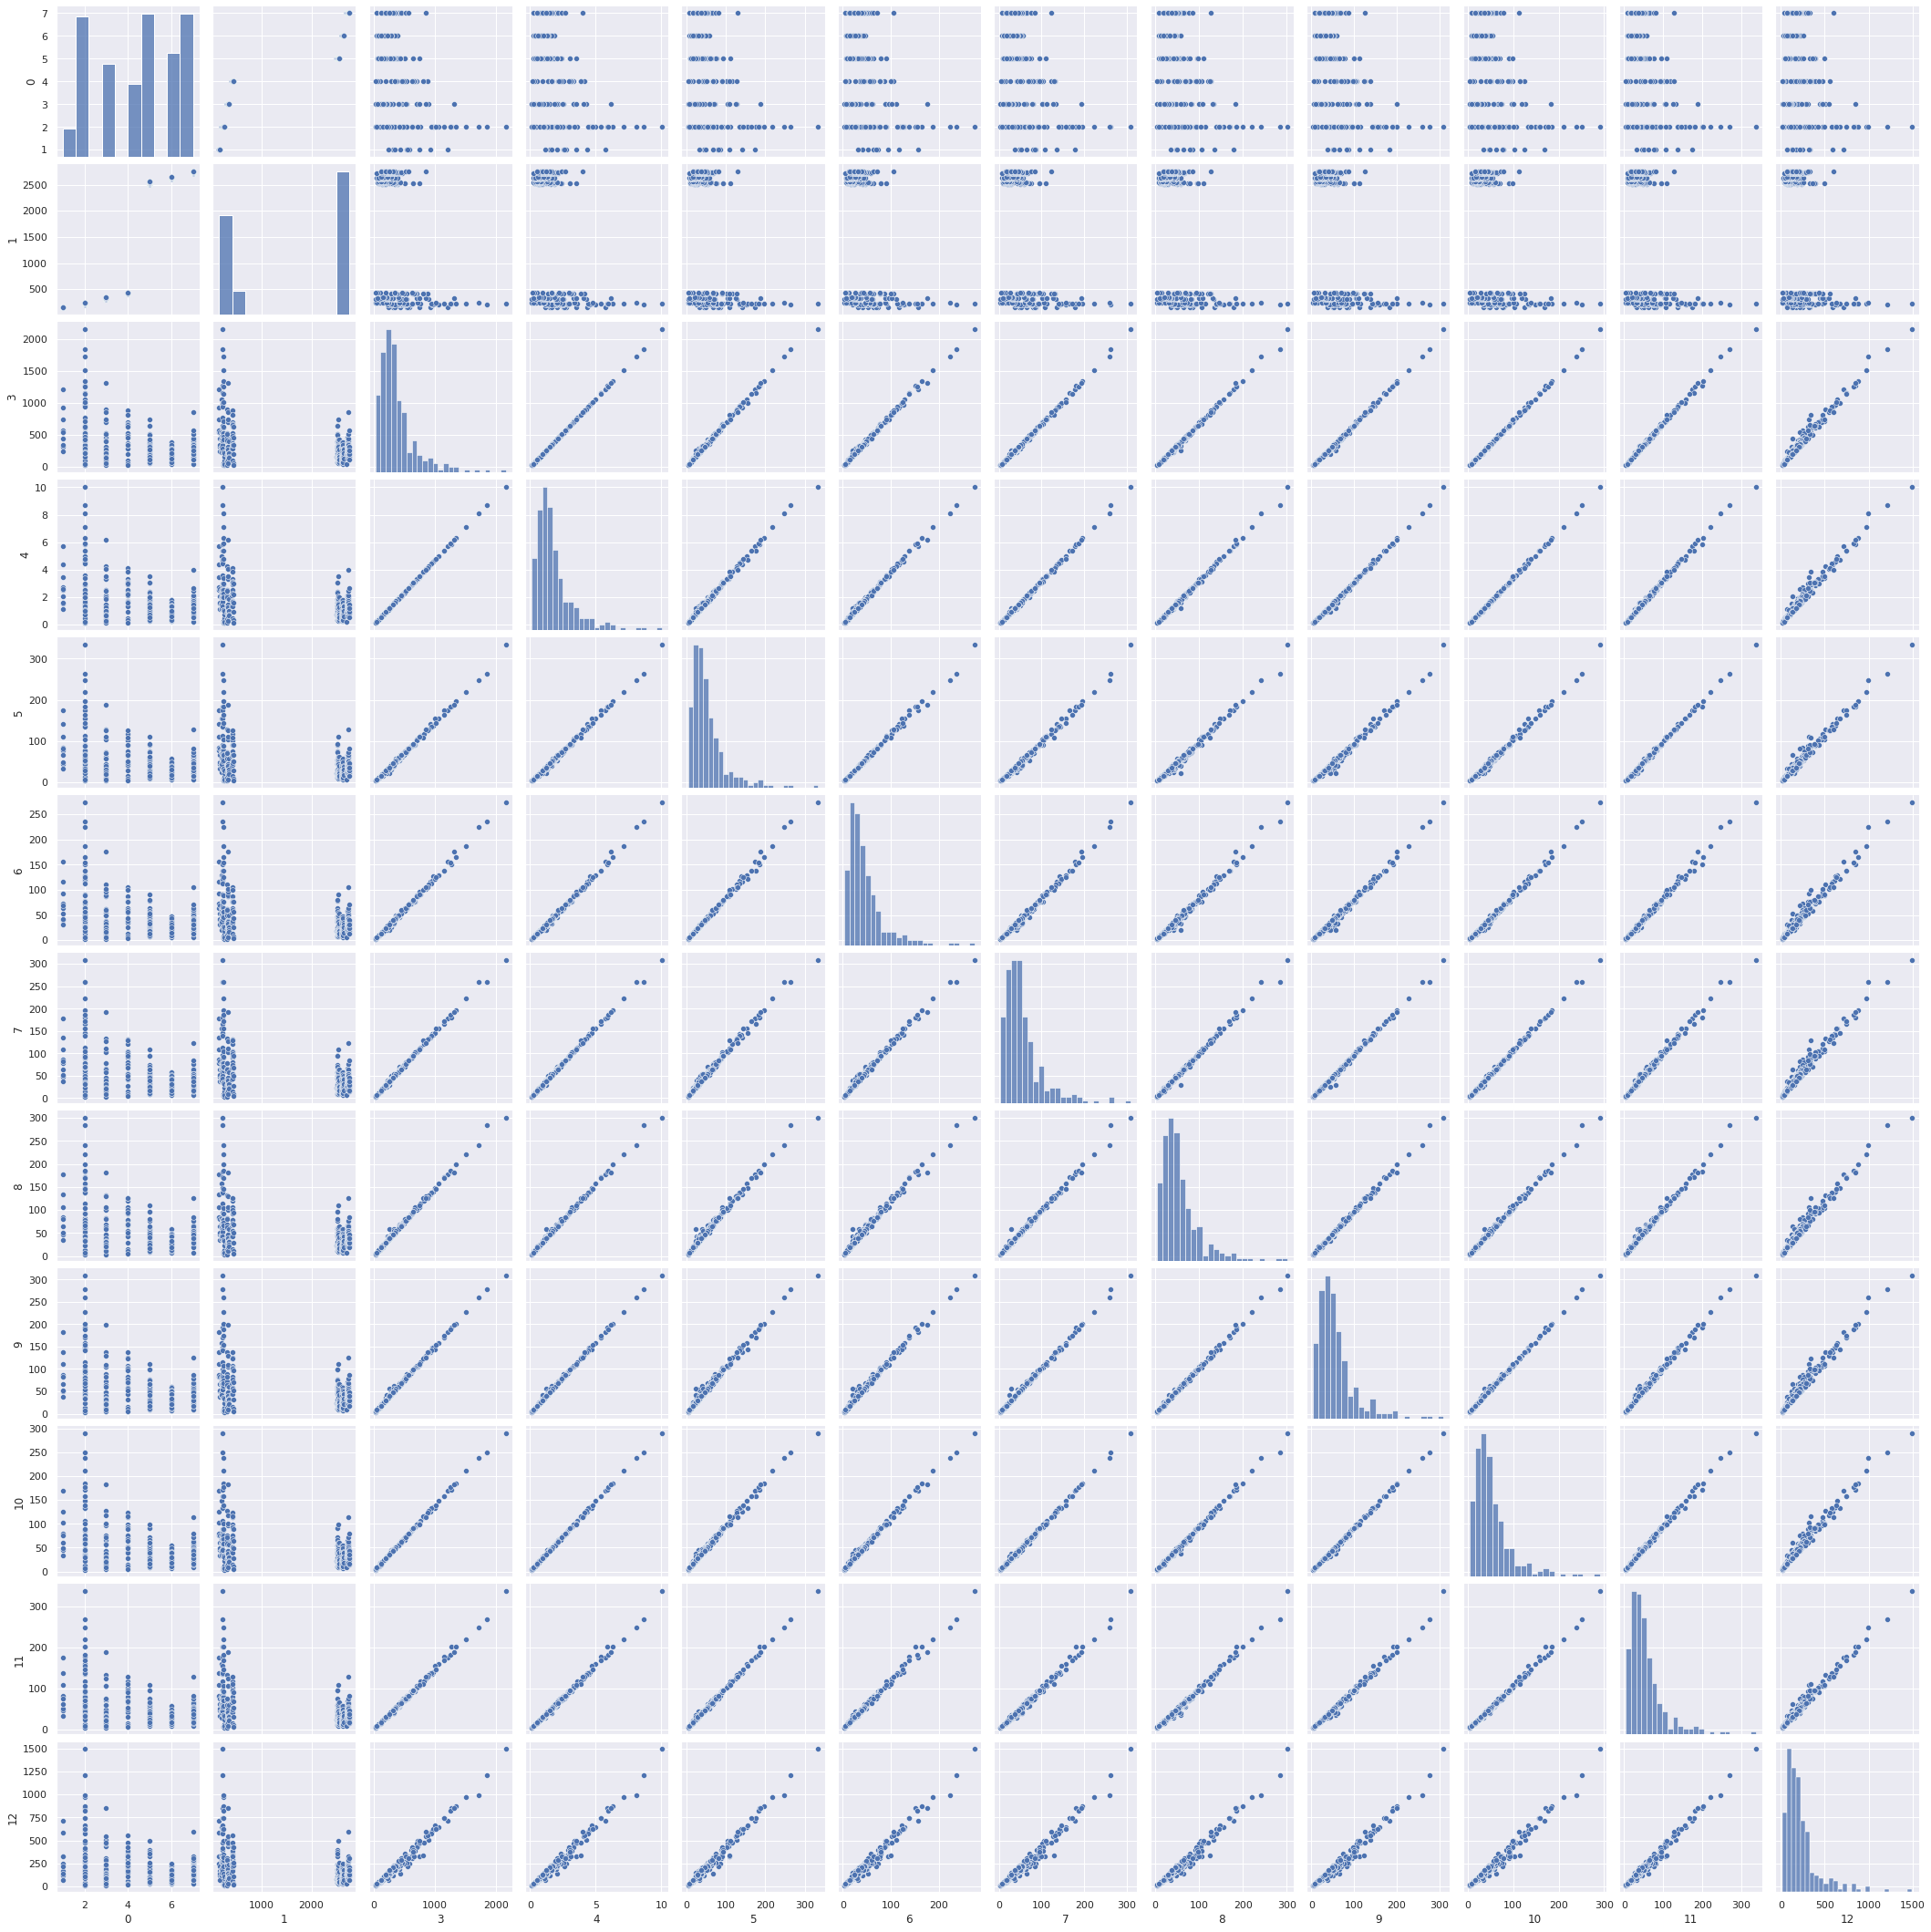

In [5]:
sns.set()
sns.pairplot(df_train)

In [80]:
X = df_train.iloc[:,3:-1]
y = df_train.iloc[:,[-1]]
test_x = df_test.iloc[:,3:]

print(X.shape)
print(y.shape)
print(test_x.shape)

(258, 9)
(258, 1)
(30, 9)


In [81]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.4,random_state=1,shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(154, 9)
(104, 9)
(154, 1)
(104, 1)


In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
#과적합 사례 확인 법 : max depth 3 => 5 > 7 높일 수록 학습 데이터 정확도 올라가고 
# 테스트 정확도 고정 
nei = np.arange(1,60)
train_accuracy = np.arange(len(nei))


for i,k in enumerate(nei):
    dtc = tree.DecisionTreeRegressor(criterion='mse',max_depth=k,splitter='best',min_samples_split=4)
    dtc.fit(X_train,y_train)
    y_train_pred = dtc.predict(X_train) # training accuracy
    y_test_pred = dtc.predict(X_test) # test accuracy
    train_accuracy[i] = mean_squared_error(y_test_pred,y_test) **0.5

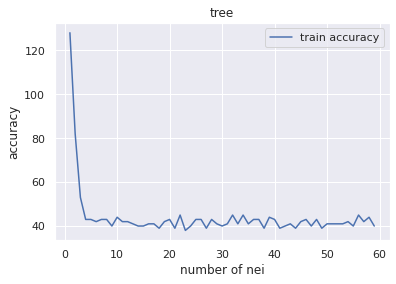

In [83]:
plt.title('tree')
plt.plot(nei,train_accuracy, label='train accuracy')
plt.legend()
plt.xlabel('number of nei')
plt.ylabel('accuracy')
plt.show()

In [85]:
#test_std = scale.transform(test_x)
dtc = tree.DecisionTreeRegressor(criterion='mse',max_depth=23,splitter='best',min_samples_split=4)
dtc.fit(X_train,y_train)

y_pred = dtc.predict(test_x)
y_pred

array([220.60886667, 227.9729    , 131.8734    ,  75.1538    ,
       182.68685   , 105.9801    , 119.93775   , 102.9725    ,
       238.92733333, 220.60886667, 147.7612    ,  70.42825   ,
       183.0159    , 149.5397    ,  57.19335   ,  70.42825   ,
        57.19335   , 119.93775   , 105.9801    ,  70.42825   ,
       227.9729    ,  57.19335   ,  57.19335   ,  57.19335   ,
        66.1868    ,  45.0886    ,  16.39825   ,  75.1538    ,
        16.39825   ,  75.1538    ])

In [86]:
submit = pd.read_csv('submit.csv')

submit

,Id,Expected
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN
6,7,NaN
7,8,NaN
8,9,NaN
9,10,NaN


In [87]:
for i in range(len(y_pred)):
    submit['Expected'][i] = y_pred[i].item()
submit

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Id,Expected
0,1,220.608867
1,2,227.972900
2,3,131.873400
3,4,75.153800
4,5,182.686850
5,6,105.980100
6,7,119.937750
7,8,102.972500
8,9,238.927333
9,10,220.608867


In [88]:
submit.to_csv('result.csv',mode='w',index=False)
!kaggle competitions submit -c metro -f result.csv -m "14010974_이기택 LATE"

100% 431/431 [00:00<00:00, 612B/s]
Successfully submitted to SejongAI.텀프로젝트.[서울교통공사 후불 승차인원 예측하기]